In [255]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
import seaborn as sns

In [256]:
df= pd.read_excel('Transposed2.xlsx',index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
Agent 0,1,9,9,11,11,8,1,2,12,7,...,7,7,1,2,7,8,7,11,9,2
Agent 1,2,10,7,14,13,11,2,2,9,7,...,14,8,1,2,7,8,11,7,9,2
Agent 2,1,8,11,13,7,14,2,2,15,13,...,7,9,2,1,9,7,7,9,11,2
Agent 3,0,2,3,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1,1,0,0
Agent 4,1,15,10,8,7,12,2,2,8,8,...,7,10,2,2,9,10,7,13,7,2


## Metrics for individual Agents

In [257]:
import math
def central_tendency(row):
    mean = math.ceil(row.mean())
    median = row.median()
    max = row.max()
    min = row.min()
    total_tasks = row.sum()
    sd =math.ceil(row.std())
    value = [mean,median,max,min,sd,total_tasks]
   
    return value



def describer(dataframe):
    mean_median = dataframe.apply(central_tendency,axis=1).copy().to_dict()    
    df= pd.DataFrame.from_dict(data=mean_median,columns=['Mean','Median','Max','Min','sd','Total Tasks'],orient='index')
    return df
    

df_mean_median = describer(df)
df_mean_median






,Mean,Median,Max,Min,sd,Total Tasks
Agent 0,7,7.0,14,1,4,583
Agent 1,7,7.0,15,1,4,563
Agent 2,7,7.5,15,1,5,588
Agent 3,1,0.0,3,0,1,45
Agent 4,8,8.0,15,1,5,613
...,...,...,...,...,...,...
Agent 1195,1,0.0,2,0,1,26
Agent 1196,3,2.0,6,0,2,175
Agent 1197,2,1.0,8,0,2,144
Agent 1198,8,7.0,15,1,5,612


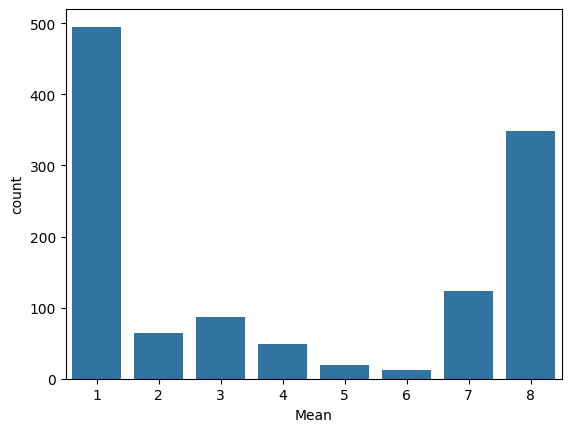

In [258]:
sns.barplot(df_mean_median['Mean'].value_counts().sort_index())
plt.show()

## Metrics for all the agents

In [259]:
description = df_mean_median['Total Tasks'].describe()
description['Sum'] = df_mean_median['Total Tasks'].sum()
description['Median']=df_mean_median['Total Tasks'].median()
description.drop(['25%','75%','50%'],axis=0)

count       1200.000000
mean         297.600000
std          257.805336
min           16.000000
max          660.000000
Sum       357120.000000
Median       203.500000
Name: Total Tasks, dtype: float64

## Grouping of agents to tiers

In [260]:
low_tier = len(df_mean_median[(df_mean_median['Total Tasks'].values<description['25%']) ])

tier_3 = len(df_mean_median[(df_mean_median['Total Tasks'].values>description['25%']) & (df_mean_median['Total Tasks'].values<description['50%']) ])

tier_2 = len(df_mean_median[(df_mean_median['Total Tasks'].values>description['50%']) & (df_mean_median['Total Tasks'].values<description['75%']) ])

tier_1 =  len(df_mean_median[(df_mean_median['Total Tasks'].values>description['75%']) ])


In [261]:
tier_dict = {'Low tier':low_tier,'Tier 3':tier_3,'Tier 2':tier_2,'Tier 1':tier_1}
tier_dict

{'Low tier': 299, 'Tier 3': 264, 'Tier 2': 296, 'Tier 1': 297}

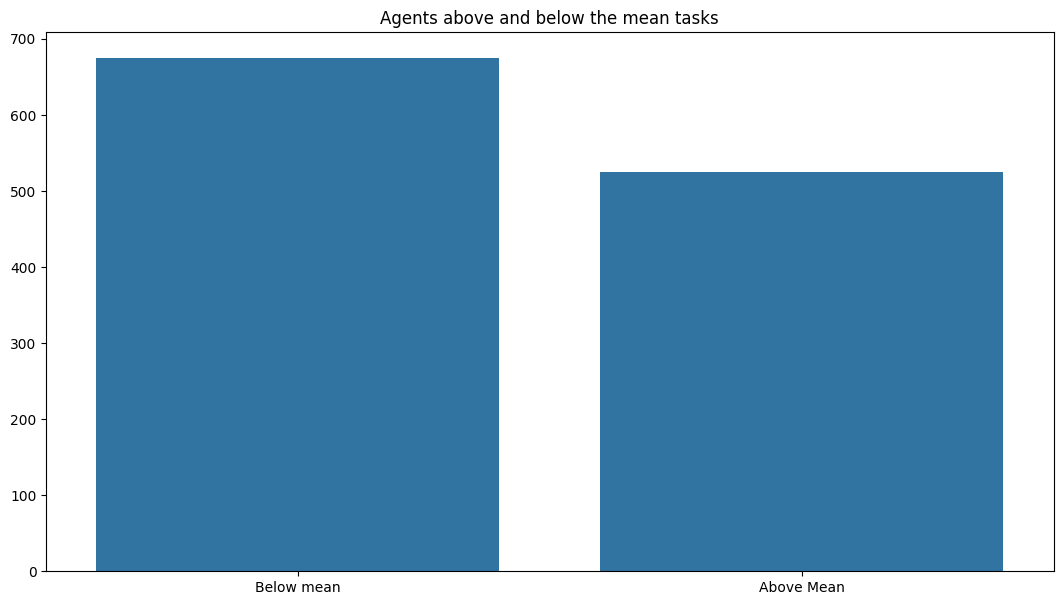

In [262]:

plt.figure(figsize=(13,7))
plt.title("Agents above and below the mean tasks")

labels = ['Below mean','Above Mean']

below_mean = len(df_mean_median[df_mean_median['Total Tasks']<df_mean_median['Total Tasks'].mean()])
above_mean =  len(df_mean_median[df_mean_median['Total Tasks']>df_mean_median['Total Tasks'].mean()])

data = {'Below mean':below_mean,'Above Mean':above_mean}

sns.barplot(data=data,x=data.keys(),y=[data[i] for i in data])

plt.show()

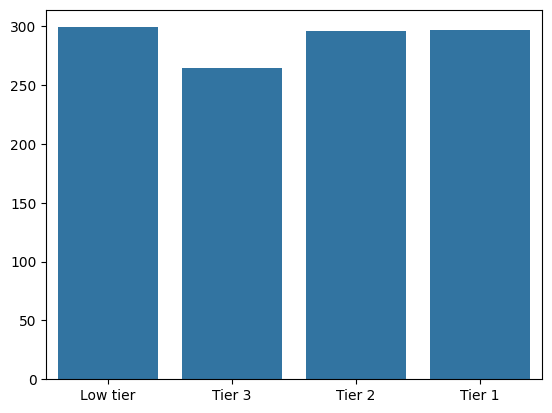

In [263]:
sns.barplot(tier_dict)
plt.show()

## Weekly analysis of agents performance


In [264]:
x=[i-1 for i in range(85) if i%7==0 and i>0] #Slicing columns from day one to day seven

def weekly(num):
    return [i for i in range(x[x.index(num)]+1)][-7:]
weeks = []
for i in x:
   weeks.append(weekly(i))
my_weeks =[(f'Week {i+1}') for i in range(len(weeks))]

In [265]:
def addition(row):
    return row.sum() #Returns the sum of tasks for each agent per week
    
sums =[]
def weekly_sum(cols):
    data = df.loc[:,cols].apply(addition,axis=1).values
    return data
    
for i in weeks:
   sums.append(weekly_sum(i)) 
       
weekly_sum_df = pd.DataFrame(data=sums,columns=df.index,index=my_weeks)
weekly_sum_df=weekly_sum_df.transpose()


    

In [266]:
weekly_sum_df.describe()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,22.457500,23.635833,24.168333,24.513333,24.79250,25.150833,25.090833,25.438333,25.458333,25.566667,25.572500,25.755000
std,22.549803,22.520676,22.239991,21.998366,22.02204,22.153225,21.972253,22.295188,22.416594,22.451368,22.546323,22.543776
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000
50%,7.000000,11.000000,13.000000,15.000000,16.00000,18.000000,18.000000,18.000000,17.000000,18.000000,19.000000,18.000000
75%,48.000000,48.250000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,49.000000
max,70.000000,67.000000,67.000000,64.000000,70.00000,72.000000,69.000000,73.000000,76.000000,90.000000,110.000000,87.000000


In [267]:
weekly_measures = describer(weekly_sum_df)
weekly_measures

,Mean,Median,Max,Min,sd,Total Tasks
Agent 0,49,47.5,57,42,5,583
Agent 1,47,46.5,59,40,6,563
Agent 2,49,48.0,59,42,6,588
Agent 3,4,4.5,6,0,3,45
Agent 4,52,50.5,62,41,7,613
...,...,...,...,...,...,...
Agent 1195,3,2.0,5,1,2,26
Agent 1196,15,14.5,23,7,6,175
Agent 1197,12,10.5,30,2,9,144
Agent 1198,51,52.0,61,42,6,612


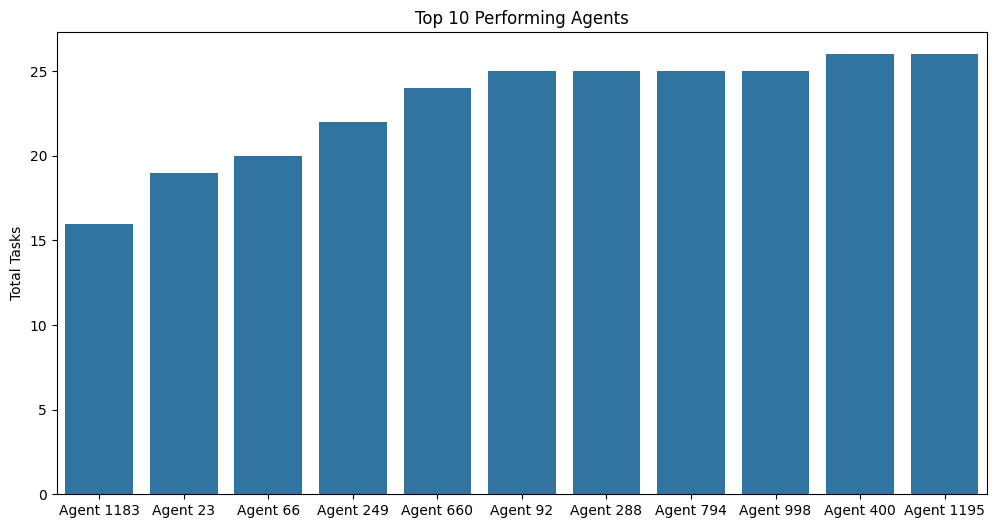

In [268]:
sort_weekly = weekly_measures.sort_values(by='Total Tasks')
plt.figure(figsize=(12,6))
plt.title('Top 10 Performing Agents')

sns.barplot(sort_weekly['Total Tasks'][:11])
plt.show()

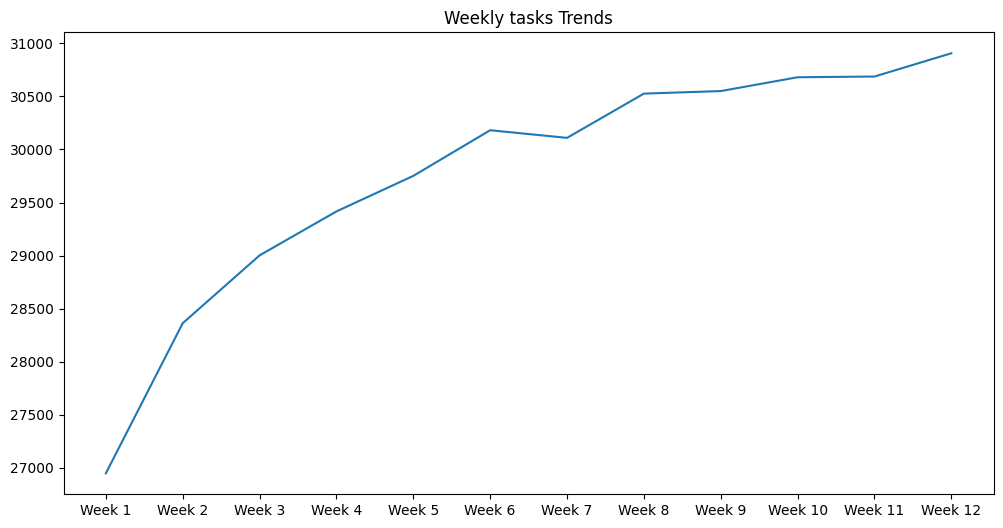

In [269]:
weekly_dict = {i:weekly_sum_df[i].sum() for i in my_weeks}
weekly_dict
plt.figure(figsize=(12,6))
plt.title('Weekly tasks Trends')
sns.lineplot(weekly_dict)
plt.show()

In [270]:
def row_total(row):
    sum = row.sum()
    return sum

weekly_sum_df['Total Tasks']=weekly_sum_df.apply(row_total,axis=1)

weekly_sum_df.head(6)

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Total Tasks
Agent 0,50,52,45,42,48,47,57,54,46,51,45,46,583
Agent 1,59,41,51,40,50,42,41,49,47,52,45,46,563
Agent 2,56,59,53,45,51,45,51,42,49,47,44,46,588
Agent 3,6,4,4,0,6,5,0,5,5,5,2,3,45
Agent 4,55,46,62,51,47,55,45,55,45,41,61,50,613
Agent 5,46,64,47,50,44,60,45,58,50,58,53,43,618


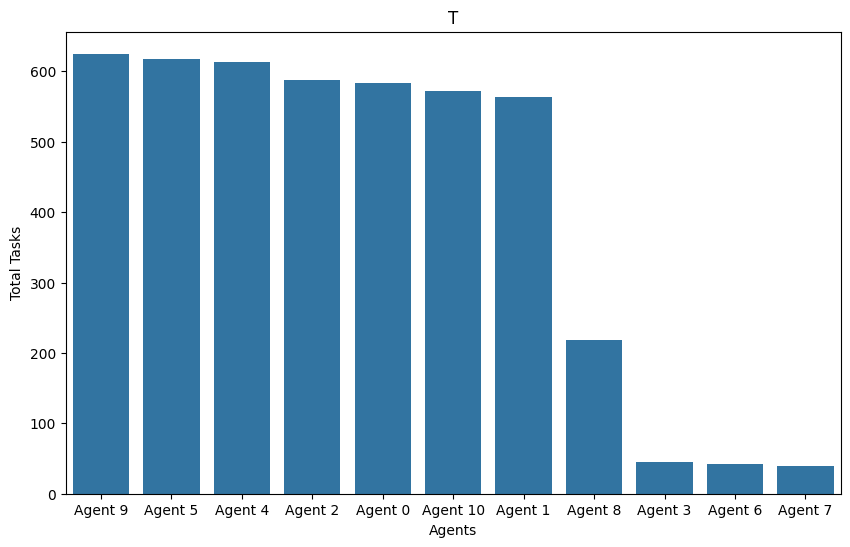

In [271]:
slice_weekly =weekly_sum_df[:11].sort_values(by='Total Tasks',ascending=False).copy()
slice_weekly

plt.figure(figsize=(10,6))
sns.barplot(slice_weekly,x=slice_weekly.index,y=slice_weekly['Total Tasks'])
plt.xlabel('Agents')
plt.title('T')
plt.show()


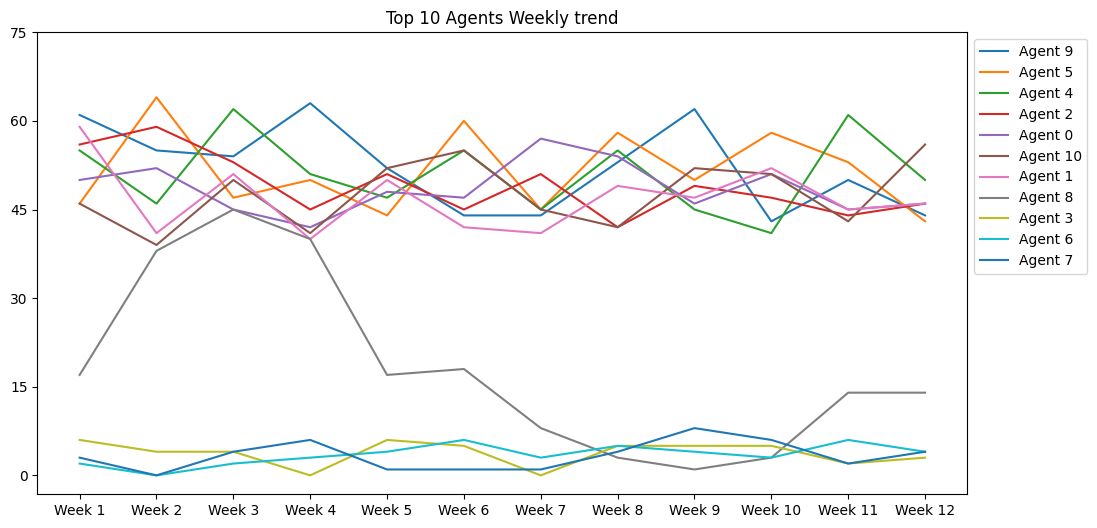

In [272]:
agents_slice = list(slice_weekly.index)
agents_slice

vals ={i:slice_weekly.iloc[agents_slice.index(i)].values[:-1] for i in agents_slice}
vals

y_ticks = np.arange(0,87,15)
fig,ax=  plt.subplots(figsize=(12,6))
for i in vals:
    ax.plot(my_weeks,vals[i],label=i)
    ax.legend(bbox_to_anchor=(1,1))
    ax.set_yticks(y_ticks)

# sns.lineplot(vals)
plt.title('Top 10 Agents Weekly trend')
plt.show()
